<a href="https://colab.research.google.com/github/Jandsy/ml_finance_imperial/blob/main/Programming_Sessions/Programming_session_2/Programming_Session_2_corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Machine Learning and Finance </center>**


## <center> Programming Session 2 - Linear Regression Analysis Correction </center>


# Linear Regression Analysis

## Outline

- [Create Fake Data](#Create-Fake-Data)
- [Solve the Linear Regression issue via the Analytical Solution](#Solve-the-Linear-Regression-issue-via-the-Analytical-Solution)
- [Solve the Linear Regression problem using Gradient Descent](#Solve-the-Linear-Regression-problem-using-Gradient-Descent)
- [Solve the Linear Regression issue via statsmodels](#Solve-the-Linear-Regression-issue-via-statsmodels)
- [Optional Part: Fama French](#Optional-Part-Fama-French)
- [Summary](#Summary)

## Introduction

In this notebook, we embark on a journey through the foundational concepts of Linear Regression, a staple in the field of machine learning and statistics. We'll explore different methods to address a common regression problem, each with its unique approach and nuances.

## Challenge

The challenge lies in accurately predicting a continuous outcome variable based on one or more predictor variables. This process, known as Linear Regression, is pivotal for understanding relationships within data and making informed predictions.

## DataSet Overview

The dataset we'll be using is synthesized, designed to mimic real-world scenarios where Linear Regression techniques are applicable. It consists of various features that influence the target variable in a linear manner, providing a clear setting for our regression exercises.

## Objectives

Our objectives are multi-fold:
1. **Create Fake Data**: Generate a synthetic dataset to simulate real-world data analysis conditions.
2. **Solve the Linear Regression issue via the Analytical Solution**: Implement the mathematical solution to find the best-fitting line through our data points.
3. **Solve the Linear Regression problem using Gradient Descent**: Apply this iterative optimization algorithm to minimize the cost function in our regression model.
4. **Solve the Linear Regression issue via statsmodels**: Utilize the statsmodels library to approach Linear Regression from a statistical standpoint.
5. **Summary**: Conclude with a comparison of the different approaches and insights gained throughout the exercises.

By the end of this notebook, you'll have a comprehensive understanding of Linear Regression and the various strategies to implement it, each with their own merits and use cases.


<font color=green>Q0:</font>
<br><font color='green'>
Write the Python code to import the necessary libraries for array manipulation and data visualization.

In [2]:
# Import Modules
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import statsmodels.api as sm

## Create Fake Data


---
<font color=green>Q1:</font>
<br><font color='green'>
Let's construct a simulated dataset with the goal of forecasting an employee's future prospects based on their years of experience.
</font>

---

In [3]:
N = 100
D = 1

np.random.seed(0)
X = np.random.randn(N, D)*4 + 20

true_W = 0.5
true_b = 0.7

Y = X.dot(true_W) + true_b + np.random.randn(N, D)


---
<font color=green>Q2:</font>
<br><font color='green'>
Visualize the simulated data
</font>

---

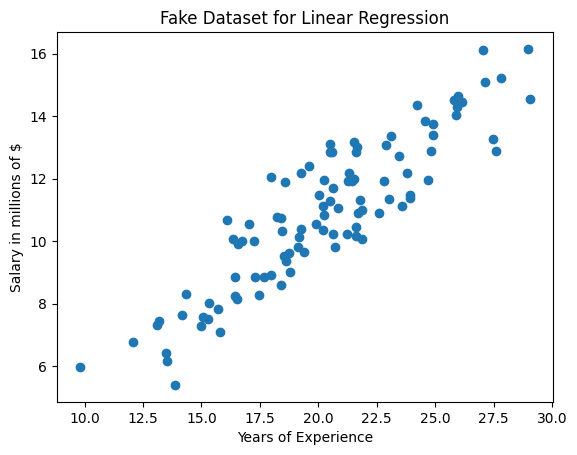

In [4]:
plt.scatter(X, Y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary in millions of $')
plt.title('Fake Dataset for Linear Regression')
plt.show()



---
<font color=green>Q3:</font>
<br><font color='green'>
Display the optimal line that was employed to generate the synthetic data
</font>

---

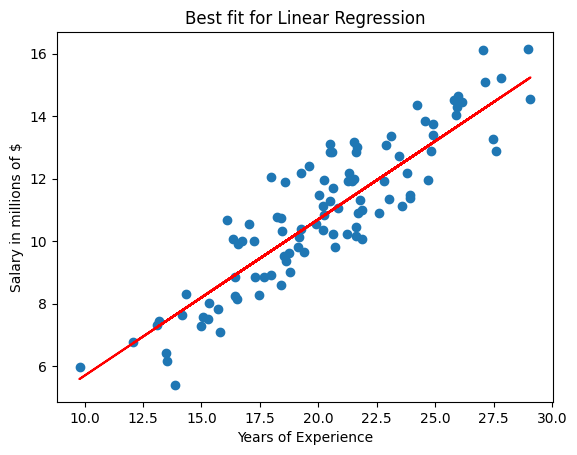

In [5]:
Y_hat = X.dot(true_W) + true_b

plt.scatter(X, Y)
plt.plot(X, Y_hat, c='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary in millions of $')
plt.title('Best fit for Linear Regression')
plt.show()



---
<font color=green>Q4:</font>
<br><font color='green'>
Let's perform the change of variable:
</font>

---

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=11uenRL0GgXIl_4-0Bzi0jcyG_8PVl9Ug"></center>

In [7]:
N = 100
D = 1

np.random.seed(0)
X = np.random.randn(N, D)*4 + 20

true_W = 0.5
true_b = 0.7

Y = X.dot(true_W) + true_b + np.random.randn(N, D)

X_hat = np.concatenate((X, np.ones((N, 1))), axis =1)

## Solve the Linear Regression issue via the Analytical Solution

Loss and Gradient expressions:

<center><img width="500" src = "https://drive.google.com/uc?export=view&id=1t9zKI1ohGwJTzA4ir4De2ypMVO2vdmLQ"></center>

* By setting the gradient to zero, we derive the so-called **Normal Equation**:
\begin{equation}
\hat{X}^T \hat{X} \hat{w} =  \hat{X}^T Y
\end{equation}

* Provided that $\hat{X}^T \hat{X}$ can be inverted, the optimal solution $\hat{w}^*$ is obtained through the equation:

\begin{equation}
\hat{w}^* = (\hat{X}^T \hat{X})^{-1} \hat{X}^T Y
\end{equation}



---
<font color=green>Q5:</font>
<br><font color='green'> Compute $\hat{w}^*$
</font>

---

In [11]:
w_normal = (np.linalg.inv(X_hat.T.dot(X_hat))).dot(X_hat.T).dot(Y)

In [12]:
print(w_normal)

[[0.52867461]
 [0.20166092]]


array([[0.52867461],
       [0.20166092]])




---
<font color=green>Q6:</font>
<br><font color='green'>
Display the regression line derived from solving the normal equation

</font>

---

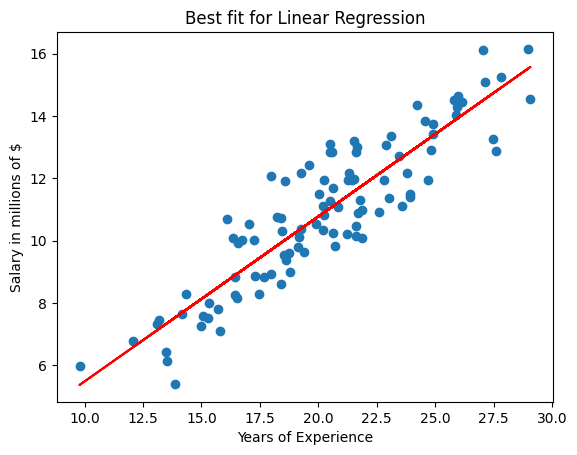

In [13]:
Y_hat = X.dot(w_normal[0]) + w_normal[1]

plt.scatter(X, Y)
plt.plot(X, Y_hat, c='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary in millions of $')
plt.title('Best fit for Linear Regression')
plt.show()

## Solve the Linear Regression problem using Gradient Descent in numpy

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=10YjrbBSmNh910jcnkKiUVccPVQCKFbPU"></center>


---
<font color=green>Q7:</font>
<br><font color='green'>
Execute the optimization through gradient descent

</font>

---

In [14]:
max_iter = 20 # number of iterations for gradient descent
eta = 0.001 # learning rate

losses = []

# Gradient Descent Algorithm
W_hat = np.random.random((D+1, 1))
for i in range(20):
    ## Compute the loss ||z||^2 = z.T z
    P = X_hat.dot(W_hat)
    loss = 1/N*(((P-Y).T).dot(P-Y))
    ## Append the loss to losses list
    losses.append(float(loss))
    ## update W_hat using update formula
    grad_W_hat = 2/N*(X_hat.T.dot(X_hat.dot(W_hat)) - X_hat.T.dot(Y))

    W_hat = W_hat -eta*grad_W_hat

<ipython-input-14-a0b3af86b6a2>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  losses.append(float(loss))


In [17]:
print(W_hat)

[[0.52536521]
 [0.27129197]]




---
<font color=green>Q8:</font>
<br><font color='green'>
Display the losses
</font>

---

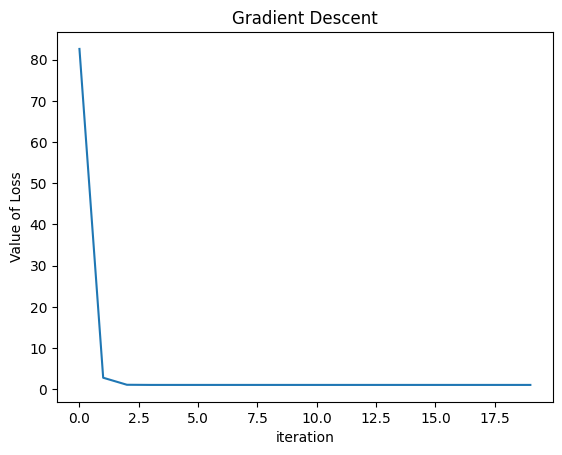

In [16]:
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Value of Loss')

plt.title('Gradient Descent')
plt.show()



---
<font color=green>Q9:</font>
<br><font color='green'>
Display the regression line determined by the gradient descent method
</font>

---

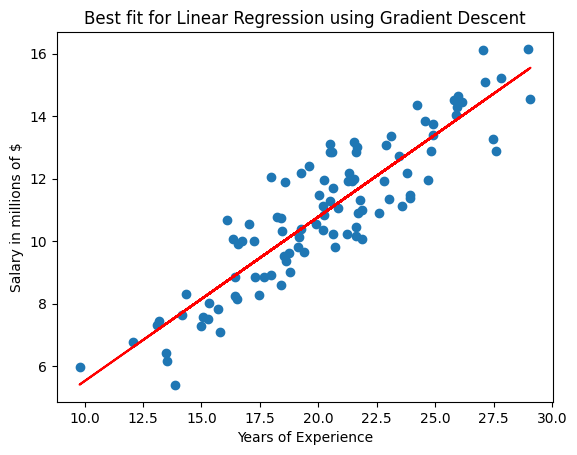

In [19]:
Y_hat = X.dot(W_hat[0]) + W_hat[1]

plt.scatter(X, Y)
plt.plot(X, Y_hat, c='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary in millions of $')
plt.title('Best fit for Linear Regression using Gradient Descent')
plt.show()

## Solve the Linear Regression issue via statsmodels



In this section, we'll explore how to perform linear regression using the `statsmodels.api` library. `statsmodels` is a powerful Python package that provides many tools for estimating and interpreting models for statistical analysis. Specifically, for linear regression, it offers a straightforward way to fit a model, analyze the summary of the model's performance, and understand the relationship between variables.

### Getting Started with statsmodels

To use `statsmodels.api` for linear regression, you typically follow these steps:

1. **Define your model:** Use the `OLS` class from `statsmodels.api` to specify your model. This involves defining the dependent variable (the variable you're trying to predict) and the independent variables (the variables you're using to make predictions).
2. **Fit your model:** Call the `.fit()` method on your model instance to fit the linear model to your data. This step involves the actual computation to find the coefficients that minimize the difference between the predicted and actual values.
3. **Analyze the results:** After fitting the model, you can use the `.summary()` method to get a detailed report of the model's performance, including coefficients, standard errors, and various statistical tests.


---
<font color=green>Q10:</font>
<br><font color='green'>
Apply an Ordinary Least Squares (OLS) regression using statsmodels.api to the variables X and Y
</font>

---

In [22]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     421.1
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           2.96e-37
Time:                        18:42:48   Log-Likelihood:                -144.67
No. Observations:                 100   AIC:                             293.3
Df Residuals:                      98   BIC:                             298.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2017      0.532      0.379      0.7

### Understanding the Output of results.summary() in statsmodels

The `results.summary()` method in `statsmodels` provides a comprehensive summary of the linear regression model's performance. Here's a brief overview of the key information it returns:

1. **Model and Method:** Information about the type of model fitted and the method used for fitting.

2. **Dependent Variable:** The name of the dependent variable being predicted.

3. **R-squared:** A statistical measure of how well the regression predictions approximate the real data points. An R-squared of 1 indicates that the regression predictions perfectly fit the data.

4. **Adjusted R-squared:** A modified version of R-squared that adjusts for the number of predictors in the model. It is useful in comparing models with different numbers of independent variables.

5. **F-statistic and Prob (F-statistic):** An overall statistical test of the model, where the F-statistic measures the joint effect of all the predictors. The Prob (F-statistic) is the p-value for this test, indicating the probability of observing the data if the null hypothesis that all coefficients are zero is true.

6. **AIC and BIC:** The Akaike Information Criterion and Bayesian Information Criterion, respectively, are measures of the model's goodness of fit with a penalty for the number of parameters. Lower values indicate better fit.

7. **Coefficients:** The estimated values of the regression coefficients for each independent variable and the intercept. These values indicate the change in the dependent variable for a one-unit change in the predictor variable.

8. **Std Error:** The standard error of the estimated coefficients, indicating the level of uncertainty around these estimates.

9. **t and P>|t|:** The t-statistic and corresponding p-values for the hypothesis test on each coefficient. A low p-value (<0.05) suggests that the predictor is significantly associated with the dependent variable.

10. **Confidence Interval:** The 95% confidence interval for each coefficient, providing a range within which the true coefficient value is likely to fall.

This summary provides a wealth of information for evaluating the linear regression model's performance, understanding the relationships between variables, and assessing the model's statistical significance and predictive power.


# Optional Part: Fama French

## Description

The **Fama-French three-factor model** is a framework in finance used to explain differences in the returns of stocks by identifying three key sources of risk. These factors are believed to capture a significant portion of the risk and return variations across diversified portfolios.

## Factors

1. **Market Risk (MKT)**: Captures the excess return of the market over the risk-free rate. This is considered the overall market's premium.
2. **Size (SMB, "Small Minus Big")**: Measures the excess return of small-cap stocks over large-cap stocks, reflecting the size effect in stock returns.
3. **Value (HML, "High Minus Low")**: Represents the excess return of stocks with high book-to-market ratios over those with low ratios, emphasizing the value effect.

## Mathematical Representation

The model can be expressed mathematically as follows:

$$ R_i - R_f = \alpha_i + \beta_{iM} \times (R_M - R_f) + \beta_{iSMB} \times SMB + \beta_{iHML} \times HML + \epsilon_i $$

Where:
- $ R_i $ is the return on stock $ i $
- $R_f $ is the risk-free rate
- $ R_M $ is the return on the market portfolio
- $ \alpha_i $ is the abnormal return (or alpha) of stock $ i $
- $ \beta_{iM} $, $ \beta_{iSMB} $, and $ \beta_{iHML} $ are the sensitivities to the market excess return, size premium, and value premium, respectively
- $ SMB $ represents the small minus big size premium
- $ HML $ represents the high minus low value premium
- $ \epsilon_i $ is the idiosyncratic or residual risk not captured by the model



---
<font color=green>Q11:</font>
<br><font color='green'>
Access the Fama-French three-factor model data from the GitHub course page.
</font>

---

In [25]:
fama_french = pd.read_csv('https://raw.githubusercontent.com/Jandsy/ml_finance_imperial/main/Programming_Sessions/Programming_session_2/fama_french_3_factors.CSV', index_col = 0)

In [27]:
fama_french.tail()

,Mkt-RF,SMB,HML,RF
20240223,0.02,0.28,-0.03,0.021
20240226,-0.26,1.00,-0.11,0.021
20240227,0.27,1.19,-0.45,0.021
20240228,-0.26,-0.85,0.00,0.021
20240229,0.54,-0.34,0.98,0.021


In [34]:
fama_french.index.name = 'Date'
fama_french.reset_index(inplace = True)
fama_french['Date'] = pd.to_datetime(fama_french['Date'], format = '%Y%m%d')

In [35]:
fama_french

,Date,Mkt-RF,SMB,HML,RF
0,1926-07-01,0.10,-0.25,-0.27,0.009
1,1926-07-02,0.45,-0.33,-0.06,0.009
2,1926-07-06,0.17,0.30,-0.39,0.009
3,1926-07-07,0.09,-0.58,0.02,0.009
4,1926-07-08,0.21,-0.38,0.19,0.009
...,...,...,...,...,...
25685,2024-02-23,0.02,0.28,-0.03,0.021
25686,2024-02-26,-0.26,1.00,-0.11,0.021
25687,2024-02-27,0.27,1.19,-0.45,0.021
25688,2024-02-28,-0.26,-0.85,0.00,0.021


---
<font color=green>Q12:</font>
<br><font color='green'>
Retrieve the historical stock price data for AAPL using the yfinance library.
</font>

---

In [28]:
import yfinance as yf

data_aapl = yf.download("AAPL", period = '1Y')

[*********************100%%**********************]  1 of 1 completed


In [29]:
data_aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-24,165.000000,165.600006,163.889999,165.330002,164.452209,41949600
2023-04-25,165.190002,166.309998,163.729996,163.770004,162.900482,48714100
2023-04-26,163.059998,165.279999,162.800003,163.759995,162.890533,45498800
2023-04-27,165.190002,168.559998,165.190002,168.410004,167.515854,64902300
2023-04-28,168.490005,169.850006,167.880005,169.679993,168.779099,55209200
...,...,...,...,...,...,...
2024-04-17,169.610001,170.649994,168.000000,168.000000,168.000000,50901200
2024-04-18,168.029999,168.639999,166.550003,167.039993,167.039993,43122900
2024-04-19,166.210007,166.399994,164.080002,165.000000,165.000000,67772100


---
<font color=green>Q13:</font>
<br><font color='green'>
Conduct a regression analysis of AAPL stock against the Fama-French factors using the statsmodels library.
</font>

---

In [30]:
data_aapl['return'] = (data_aapl['Adj Close']/data_aapl['Adj Close'].shift(1) - 1)
data_aapl.head()

,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2023-04-24,165.000000,165.600006,163.889999,165.330002,164.452209,41949600,NaN
2023-04-25,165.190002,166.309998,163.729996,163.770004,162.900482,48714100,-0.009436
2023-04-26,163.059998,165.279999,162.800003,163.759995,162.890533,45498800,-0.000061
2023-04-27,165.190002,168.559998,165.190002,168.410004,167.515854,64902300,0.028395
2023-04-28,168.490005,169.850006,167.880005,169.679993,168.779099,55209200,0.007541


In [36]:
data_aapl = data_aapl.dropna()
data_aapl = data_aapl[['return']]

In [37]:
data_aapl

,return
Date,
2023-04-25,-0.009436
2023-04-26,-0.000061
2023-04-27,0.028395
2023-04-28,0.007541
2023-05-01,-0.000530
...,...
2024-04-17,-0.008147
2024-04-18,-0.005714
2024-04-19,-0.012213


In [38]:
df_fama_french_aapl_merged = pd.merge(data_aapl, fama_french, on =['Date'])

In [40]:
df_fama_french_aapl_merged['excess_return'] = df_fama_french_aapl_merged['return'] - df_fama_french_aapl_merged['RF']

In [41]:
df_fama_french_aapl_merged.head()

,Date,return,Mkt-RF,SMB,HML,RF,excess_return
0,2023-04-25,-0.009436,-1.76,-0.99,0.11,0.018,-0.027436
1,2023-04-26,-0.000061,-0.41,0.14,-0.75,0.018,-0.018061
2,2023-04-27,0.028395,1.85,-0.56,0.01,0.018,0.010395
3,2023-04-28,0.007541,0.77,0.15,0.17,0.018,-0.010459
4,2023-05-01,-0.000530,-0.02,0.30,-0.78,0.016,-0.016530


In [42]:
X = sm.add_constant(df_fama_french_aapl_merged[['Mkt-RF', 'SMB', 'HML']])
y = df_fama_french_aapl_merged['excess_return']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          excess_return   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     64.35
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           1.50e-29
Time:                        18:56:57   Log-Likelihood:                 710.54
No. Observations:                 214   AIC:                            -1413.
Df Residuals:                     210   BIC:                            -1400.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0208      0.001    -34.150      0.0

# Wrap-up

This lecture covered different methods for fitting regression model parameters.

* Determining parameters of the Linear Regression Model using the closed-form solution.
* Estimating parameters of the Linear Regression Model through gradient descent.
* Utilizing statsmodels to perform regression analysis on actual stock data.

